In [1]:
import os
import cv2

import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
tumour_images=[]
for name in glob.glob('Brain MRI Images/yes/*.jpg'): 
    image = cv2.imread(name)
    image = cv2.resize(image,(240,240))
    tumour_images.append(image)

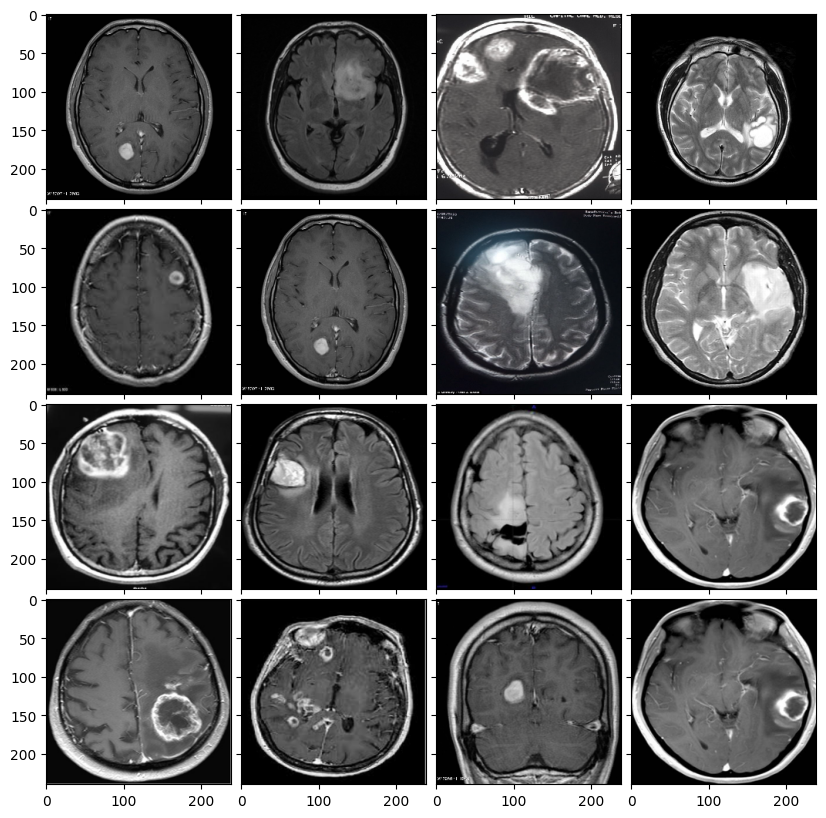

In [3]:
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4),  axes_pad=0.1,   )
for ax, im in zip(grid, tumour_images[0:16]):
    ax.imshow(im)
plt.show()

In [27]:
img_path = "Brain MRI Images/yes/Y1.jpg"
image = cv2.imread(img_path)
print("width: {} pixels".format(image.shape[1]))
print("height: {} pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))
dim=(500,590)
image=cv2.resize(image, dim)

width: 180 pixels
height: 218 pixels
channels: 3


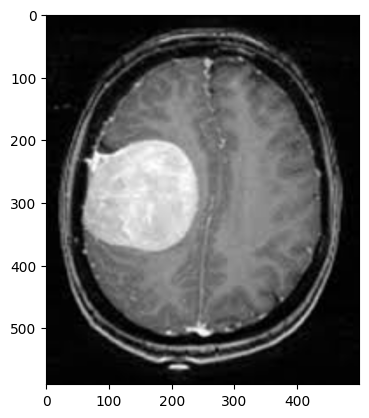

In [28]:
plt.imshow(image)

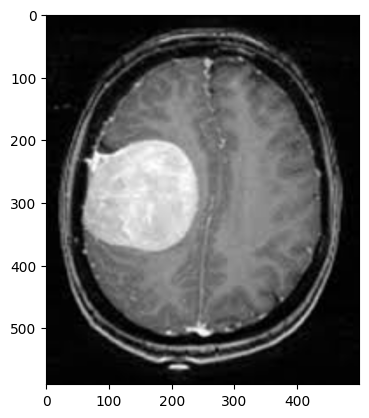

In [29]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY, 0.7)
plt.imshow(image)

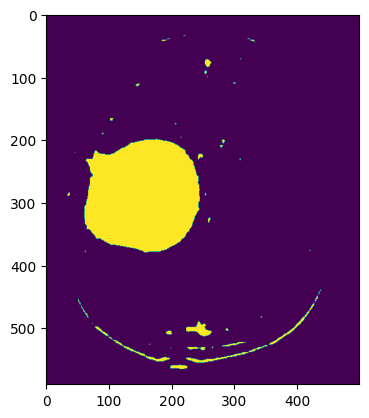

In [30]:
(T, thresh) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)

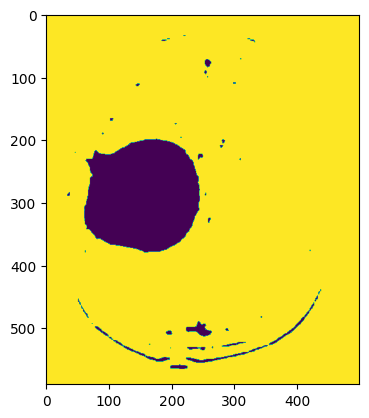

In [31]:
(T, threshInv) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshInv)

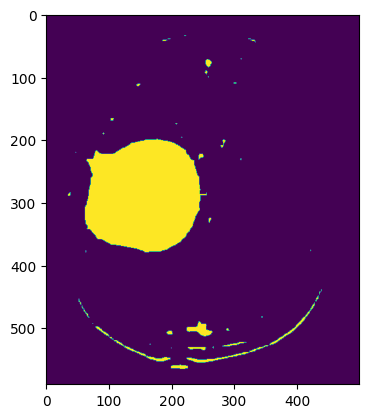

In [32]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed)

In [33]:
closed = cv2.erode(closed, None, iterations = 19)
closed = cv2.dilate(closed, None, iterations = 17)

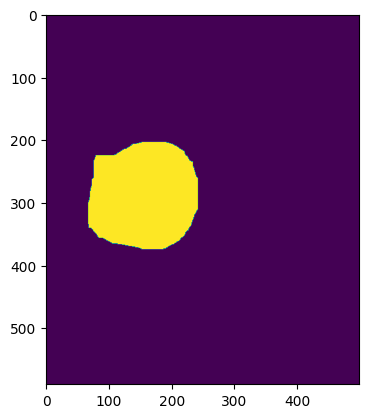

In [34]:
plt.imshow(closed)


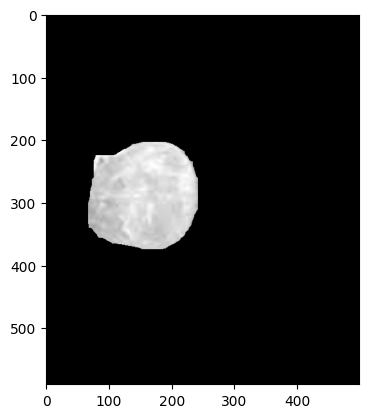

In [35]:
ret,mask = cv2.threshold(closed, 155, 255, cv2.THRESH_BINARY) 
#apply AND operation on image and mask generated by thrresholding
final = cv2.bitwise_and(image,image,mask = mask) 
plt.imshow(final)

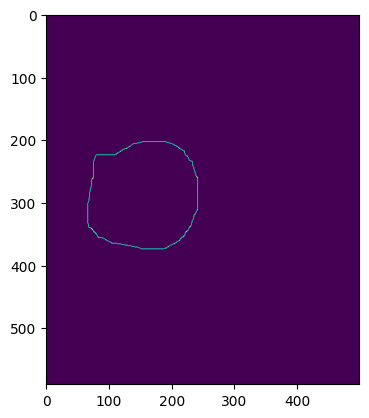

In [36]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged
canny = auto_canny(closed)
plt.imshow(canny)

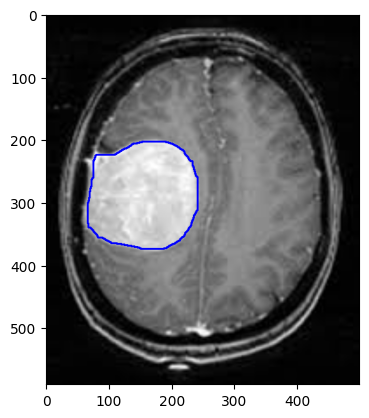

In [37]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, cnts, -1, (0, 0, 255), 2)
plt.imshow(image) 

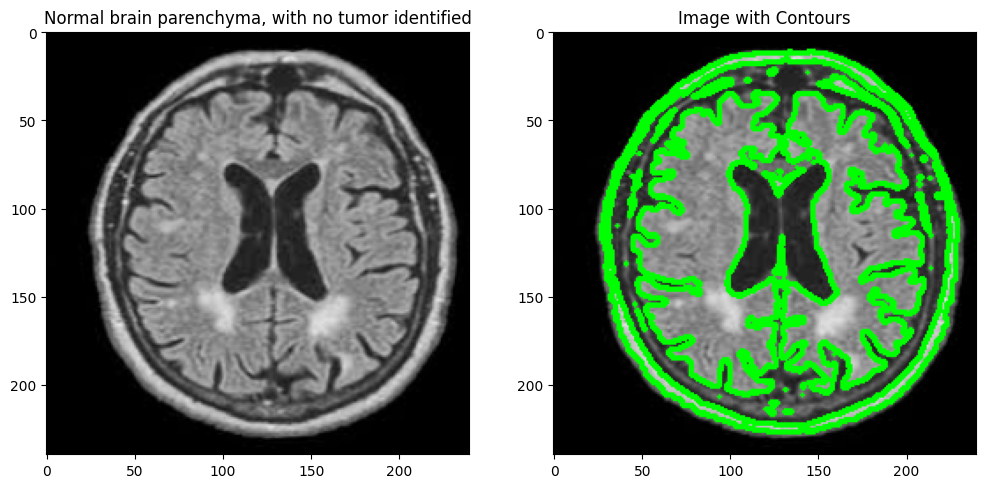

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# List to store tumor images
tumor_images = []

# Load and resize images
for name in glob.glob('Brain MRI Images/brain_tumor_dataset/no/*.jpg'): 
    image = cv2.imread(name)
    image = cv2.resize(image, (240, 240))
    tumor_images.append(image)

# Assuming you want to apply segmentation or other image processing
# Example of processing first tumor image (if any exist)
if tumor_images:
    idx_slice = 1#17  # Example index to process
    img = tumor_images[idx_slice]
    
    # Convert to grayscale for processing (if necessary)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Example of applying a binary threshold for segmentation
    _, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

    # You could apply other image processing techniques here...
    # Example: Contour detection
    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw contours on the original image
    img_contours = img.copy()
    cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)

    # Show the original image and the one with contours
    fig, ax = plt.subplots(1, 2, figsize=[12, 6])
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Normal brain parenchyma, with no tumor identified")
    ax[1].imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
    ax[1].set_title("Image with Contours")
    plt.show()
else:
    print("No images found in the specified directory.")